created by **Farah Rabie** (fr2007@hw.ac.uk)

#### Notebook 3$\,\,\,\,\,$ Well Data Visualisation (Well Logs and Lithologies)

This is the last of three notebooks covering well data manipulation and visualisation. The first two notebooks are titled **1 Data Visualisation in 2D** & **2 Data Visualisation in 3D**. This notebook covers the following **three tasks**:

- Visualise the summary statistics of well data using box plots.
- Visualise lithology distribution of a well using a histogram.
- Generate visualisations of well logs and lithology for multiple wells in the Volve field.

The data in this notebook is sourced from the Equinor Volve Field dataset.

#### Import Libraries

As always, the first step is to <span style="color:purple"> import all necessary Python libraries </span>. 

<span style="color:red"> Import the following Python libraries. </span>

- <span style="color:red">NumPy </span> (use alias *np*)
- <span style="color:red">Pandas </span> (use alias *pd*)
- <span style="color:red">PyPlot sub-module from Matplotlib </span> (use alias *plt*)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We will also be <span style="color:purple">importing *matplotlib.patches* </span>, a module in the Matplotlib library. It provides a collection of classes for creating various shapes and annotations in plots. In this code, this module is specifically used to create custom legend entries representing different lithology types with their corresponding colors and hatching styles. 

In [2]:
import matplotlib.patches as mpatches

#### Task 1$\,\,\,\,\,$ Visualise Well Data Summary Statistics

In this task, we are working with data from 7 wells in the Volve field. For each well, the log data is loaded from a *well name*_well-info.csv file, and the lithology data is loaded from a *well name*_lithology.csv file. 

Let us <span style="color:purple">begin with loading the well-info files</span>. <span style="color:red"> Can you load the following files? </span>

- *15_9-F-12_well-info.csv* from Data/15_9-F-12;
- *15_9-F-14_well-info.csv* from Data/ 15_9-F-14;
- *15_9-F-15 C_well-info.csv* from Data/15_9-F-15;
- *15_9-F-4_well-info.cs* from Data/15_9-F-4;
- *15_9-F-5_well-info.csv* from Data/15_9-F-5;
- *15_9-F-1 B_well-info.csv* from Data/15_9-F-1 B;
- *15_9-F-11 B_well-info.csv* from Data/15_9-F-11 B file.

In [3]:
well_data_12 = pd.read_csv('./Data/15_9-F-12/15_9-F-12_well-info.csv')
well_data_14 = pd.read_csv('./Data/15_9-F-14/15_9-F-14_well-info.csv')
well_data_15_C = pd.read_csv('./Data/15_9-F-15 C/15_9-F-15 C_well-info.csv')
well_data_4 = pd.read_csv('./Data/15_9-F-4/15_9-F-4_well-info.csv')
well_data_5 = pd.read_csv('./Data/15_9-F-5/15_9-F-5_well-info.csv')
well_data_1_B = pd.read_csv('./Data/15_9-F-1 B/15_9-F-1 B_well-info.csv')
well_data_11_B = pd.read_csv('./Data/15_9-F-11 B/15_9-F-11 B_well-info.csv')

We can <span style="color:purple">organise the well data into two related lists</span> for easy access and management - the first list has the well names, and the second list has the loaded well-info data for each well.

In [4]:
well_data_names = ['Well 15_9-F-12', 'Well 15_9-F-14', 'Well 15_9-F-15 C', 'Well 15_9-F-4', 'Well 15_9-F-5', 'Well 15_9-F-1 B', 'Well 15_9-F-11 B']
well_data_all = [well_data_12, well_data_14, well_data_15_C, well_data_4, well_data_5, well_data_1_B, well_data_11_B ]

Let us look at **well 15_9-F-12**. We can <span style="color:purple">visualise the distribution of its different logs</span> to enable us to identify key characteristics, trends, and potential outliers in the dataset.

We <span style="color:purple">start off with removing incomplete records</span>. 

In [5]:
well_data_12_edited = well_data_12.dropna()

Then, we <span style="color:purple">extract the relevant columns as NumPy arrays</span>.

In [6]:
GR_well_data_12 = well_data_12_edited['GR'].values
NPHI_well_data_12 = well_data_12_edited['NPHI'].values
RHOB_well_data_12 = well_data_12_edited['RHOB'].values
RT_well_data_12 = well_data_12_edited['RT'].values
DT_well_data_12 = well_data_12_edited['DT'].values

We can <span style="color:purple">use box plots to visualising the distribution of the data for **well 15_9-F-12** terms of its summary statistics</span>.

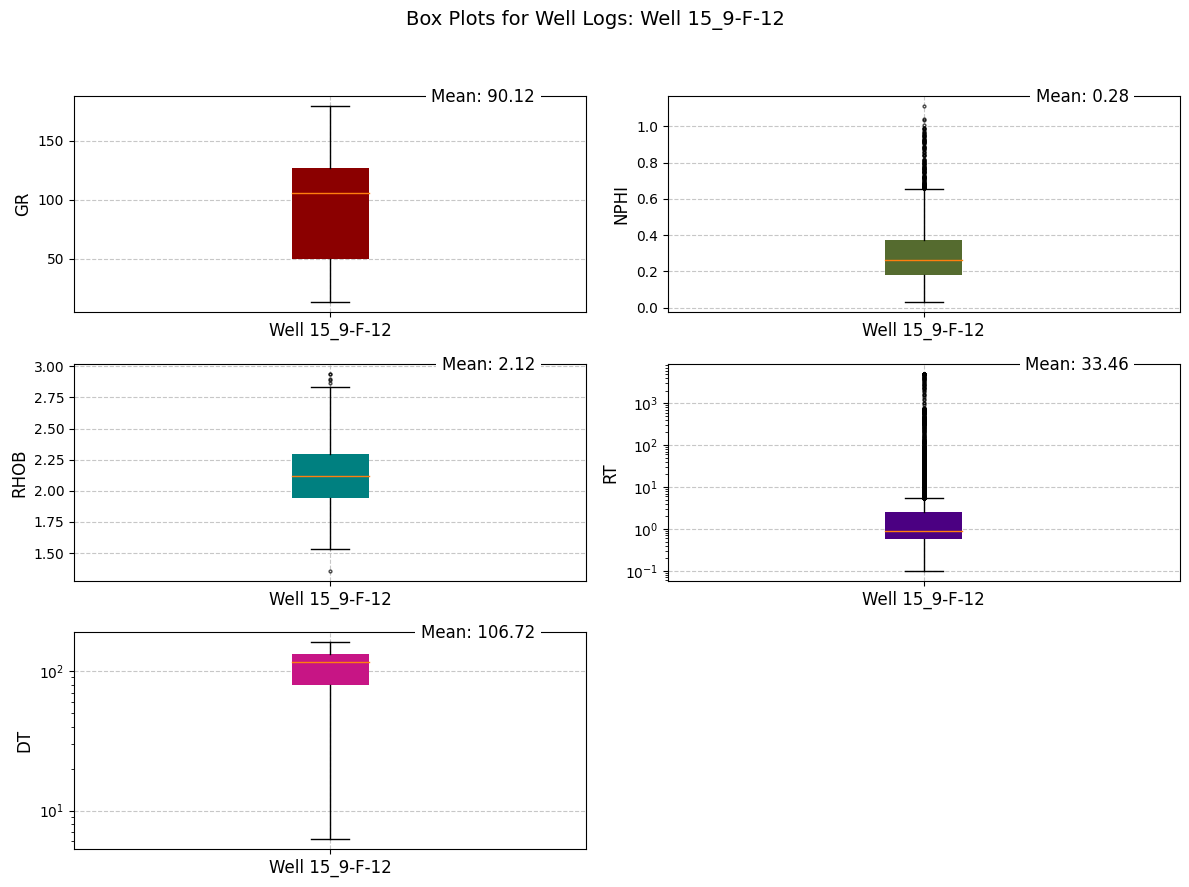

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(12, 9))

titles = ['GR', 'NPHI', 'RHOB', 'RT', 'DT'] # set titles for plots
data = [GR_well_data_12, NPHI_well_data_12, RHOB_well_data_12, RT_well_data_12, DT_well_data_12]

colors = ['darkred', 'darkolivegreen', 'teal', 'indigo', 'mediumvioletred'] # define colors for each box plot
axs = axs.flatten() # flatten axes array for easier indexing

# loop through the data and create box plots
for ax, title, values, color in zip(axs, titles, data, colors):
    # create the box plot with unique color for each
    box = ax.boxplot(values, patch_artist=True, 
                     boxprops=dict(facecolor=color, edgecolor='none'),  
                     flierprops=dict(marker='o', color=color, alpha=0.7, markersize=2),  
                     meanprops=dict(marker='D', markeredgecolor=color, markerfacecolor=color))

    # customize each plot
    ax.set_ylabel(title.split()[0], fontsize=12)  
    ax.grid(linestyle='--', alpha=0.7)
    ax.set_xticks([1])
    ax.set_xticklabels(['Well 15_9-F-12'], fontsize=12)  # X-axis label
    
    # add text for mean value inside the plot at the top right corner
    mean_value = np.mean(values)
    ax.text(1.4, max(values), f'Mean: {mean_value:.2f}', fontsize=12, color='black', 
            verticalalignment='bottom', horizontalalignment='right',  
            bbox=dict(facecolor='white', alpha=1.0, edgecolor='none'))  

    # set log scale for RT and DT
    if title in ['RT', 'DT']:
        ax.set_yscale('log')

fig.suptitle('Box Plots for Well Logs: Well 15_9-F-12', fontsize=14) # set a main title for the figure
fig.delaxes(axs[5]) # remove the empty subplot (bottom right) 

plt.tight_layout(rect=[0, 0, 1, 0.95]) # adjust layout for better spacing

plt.show() # show the plot

<br><span style="color:red"> Can you plot the box plots for **well 15_9-F-5**? </span>

#### Task 2$\,\,\,\,\,$ Visualise Well Lithology Distribution

Let us move on to the lithology data. We start off with <span style="color:purple">loading the lithology data for each of the 7 wells</span>, and <span style="color:purple">organising the lithology data in a list</span>.

In [8]:
lithology_data_12 = pd.read_csv('./Data/15_9-F-12/15_9-F-12_lithology.csv')
lithology_data_14 = pd.read_csv('./Data/15_9-F-14/15_9-F-14_lithology.csv')
lithology_data_15_C = pd.read_csv('./Data/15_9-F-15 C/15_9-F-15 C_lithology.csv')
lithology_data_4 = pd.read_csv('./Data/15_9-F-4/15_9-F-4_lithology.csv')
lithology_data_5 = pd.read_csv('./Data/15_9-F-5/15_9-F-5_lithology.csv')
lithology_data_1_B = pd.read_csv('./Data/15_9-F-1 B/15_9-F-1 B_lithology.csv')
lithology_data_11_B = pd.read_csv('./Data/15_9-F-11 B/15_9-F-11 B_lithology.csv')

lithology_data_all = [lithology_data_12, lithology_data_14, lithology_data_15_C, lithology_data_4, lithology_data_5, lithology_data_1_B, lithology_data_11_B]

Now that we have loaded both the well log data and the lithology data, <span style="color:red"> can you work out how many lithologies are present in **well 15_9-F-12**? </span>

**Hint**: Reference notebook 2, where we identified unique well names and surface names!

In [9]:
lithology_well_15_9_F_12 = lithology_data_12['Lithology'].values  # extract lithology data for well 15_9-F-12 into NumPy array
labels_lithology_well_15_9_F_12, counts_lithology_well_15_9_F_12 = np.unique(lithology_well_15_9_F_12, return_counts=True)
print(f'The lithologies present in well 15_9-F-12 are: {labels_lithology_well_15_9_F_12}')

The lithologies present in well 15_9-F-12 are: ['clay-shale' 'coal-lignite' 'limestone' 'marl' 'sandstone' 'silt'
 'unknown']


<br>To visually represent the distribution of different rock types found within the well, we can <span style="color:purple">create a histogram for the lithology of **well 15_9-F-12**</span>. By plotting the count of each lithology, the histogram provides insight into the dominant lithologies and their relative abundance across the depth of the well. 

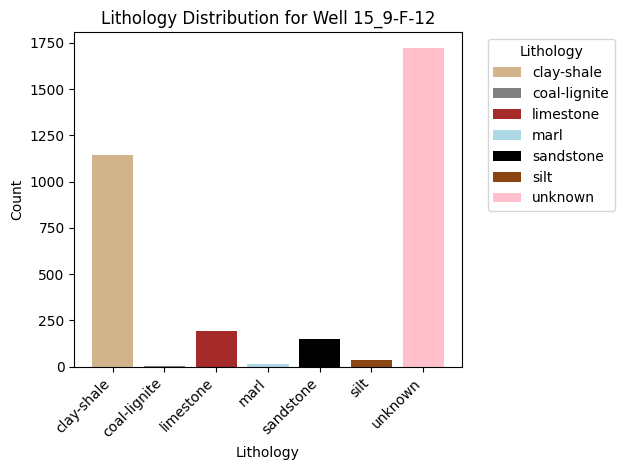

In [10]:
colors = ['#D2B48C', '#808080', '#A52A2A', '#ADD8E6', '#000000', '#8B4513', 'pink'] # assign colors to each lithology

fig, ax = plt.subplots() # create a bar plot with different colors
bars = ax.bar(labels_lithology_well_15_9_F_12, counts_lithology_well_15_9_F_12, color=colors)

ax.legend(bars, labels_lithology_well_15_9_F_12, title='Lithology', bbox_to_anchor=(1.05, 1), loc='upper left') # add a legend for the colors
plt.xticks(rotation=45, ha='right') # adjust x-axis labels for better readability
# add labels and title
ax.set_ylabel('Count')
ax.set_xlabel('Lithology')
ax.set_title('Lithology Distribution for Well 15_9-F-12')

plt.tight_layout()
plt.show()

#### Task 3$\,\,\,\,\,$ Visualise Well Log Data and Lithology

For the final task in this notebook, we are first <span style="color:purple">creating a set of lithology labels</span>, each with associated colors and hatch patterns, to visually represent different rock types (e.g., sandstone, marl, shale) in well log plots.

In [11]:
lithology_labels = {
    'sandstone': {'lith': 'sandstone', 'hatch': '///', 'color': '#F4A460'},  # Sandy brown color, diagonal hatch
    'marl': {'lith': 'marl', 'hatch': '...', 'color': '#808080'},  # Gray marl with dotted hatch
    'silt': {'lith': 'silt', 'hatch': '--', 'color': '#CD853F'},  # Darker brown with dashed hatch
    'limestone': {'lith': 'limestone', 'hatch': 'xx', 'color': '#E0FFFF'},  # Light cyan, crosshatch
    'coal-lignite': {'lith': 'coal-lignite', 'hatch': '||', 'color': '#2F4F4F'},  # Dark gray-black, vertical hatch
    'unknown': {'lith': 'unknown', 'hatch': '', 'color': 'pink'},  # Bright pink, no hatch (still unknown)
    'clay-shale': {'lith': 'clay-shale', 'hatch': '++', 'color': '#556B2F'},  # Olive green with plus-shaped hatch
}

<span style="color:purple">Let us plot them</span>.

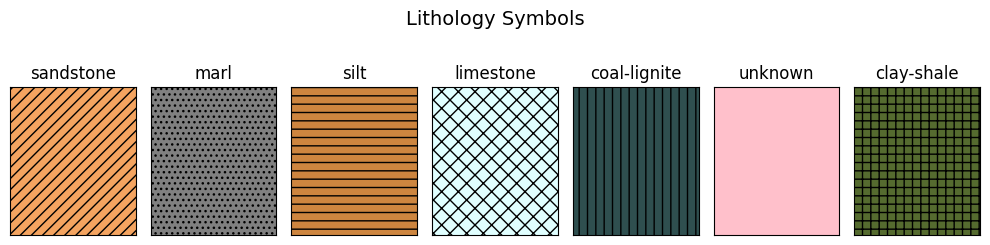

In [12]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=7,nrows=1, sharex=True, sharey=True,
                         figsize=(10,2), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_labels.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_labels[key]['color'], hatch=lithology_labels[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_labels[key]['lith']))

plt.tight_layout()
fig.suptitle('Lithology Symbols', fontsize=14, y=1.2)
plt.show()

And now, let us <span style="color:purple">plot the well logs and lithology data for each well</span>. We will do so using a *for* loop, where we:

- Extract depth and associated well log data, including gamma-ray ($GR$), porosity ($NPHI$), bulk density ($RHOB$), resistivity ($RT$), and sonic transit time ($DT$) for each well
- Plot each of these five properties in a separate subplot to visualize their variation with depth
- In a sixth subplot, we plot the lithology data, with different rock types (such as sandstone or shale) indicated by color and hatch patterns.

The depth axis is shared across subplots and inverted to reflect drilling depth correctly. A legend is added to the lithology plot, and the entire visualization is customized with appropriate labels, scales, and plot titles for clear geological interpretation. This setup helps analyse subsurface formations in terms of physical properties and rock type distribution across depth.

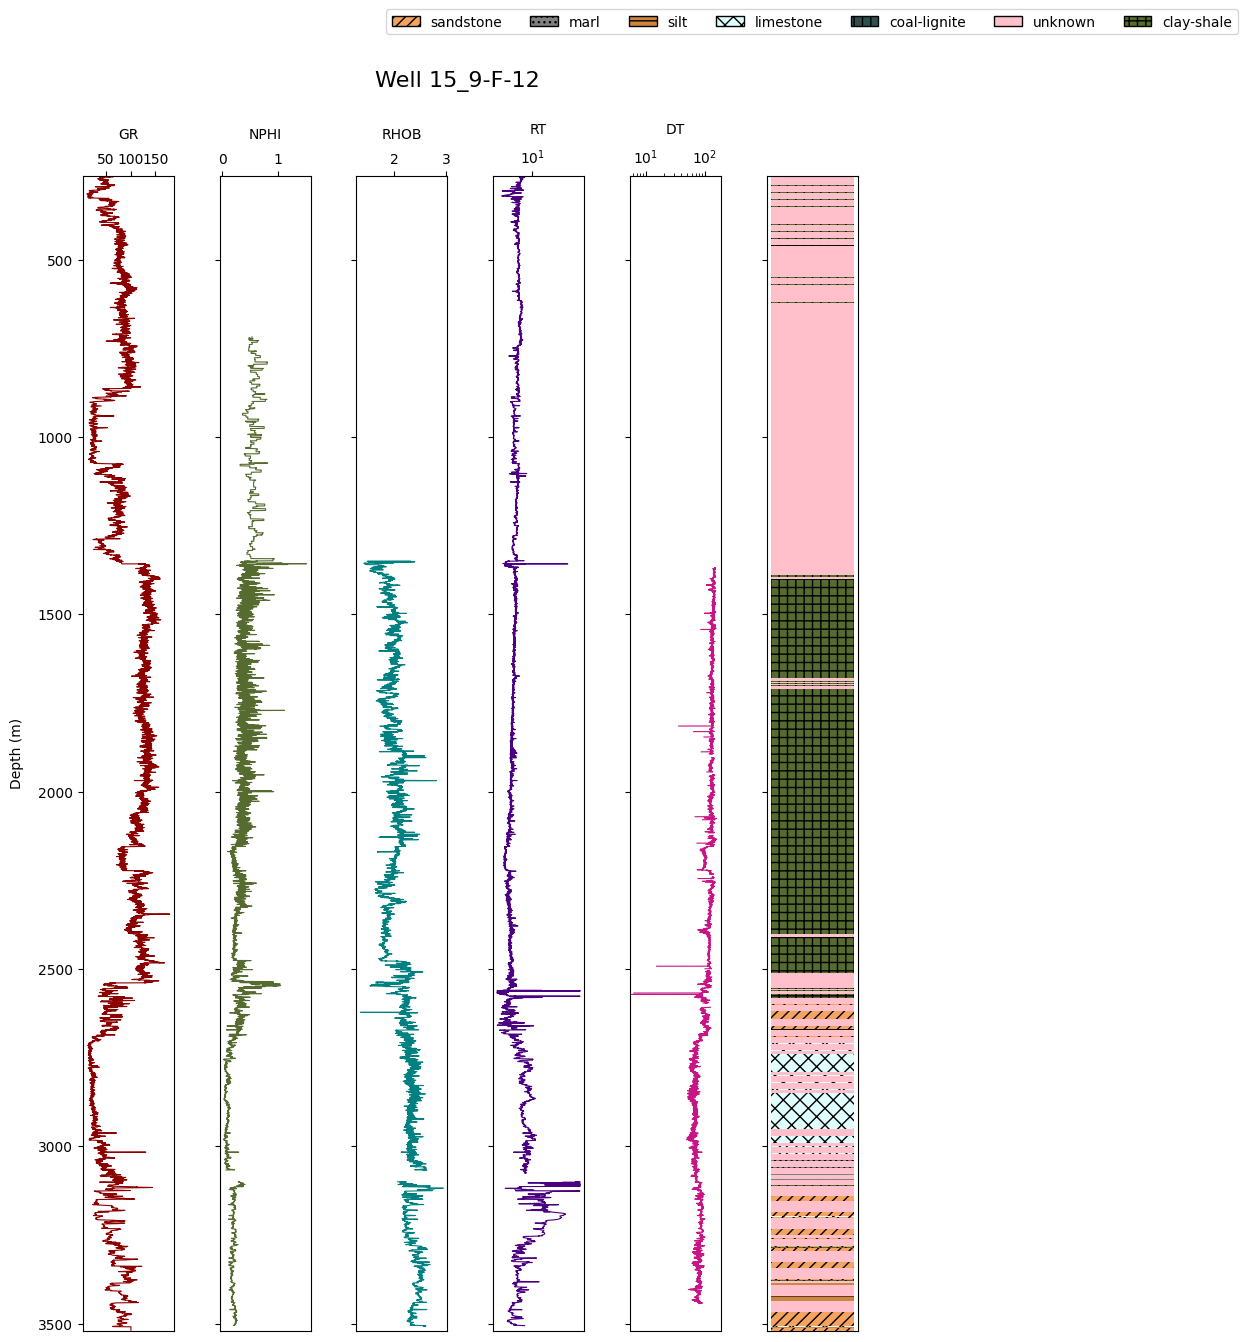

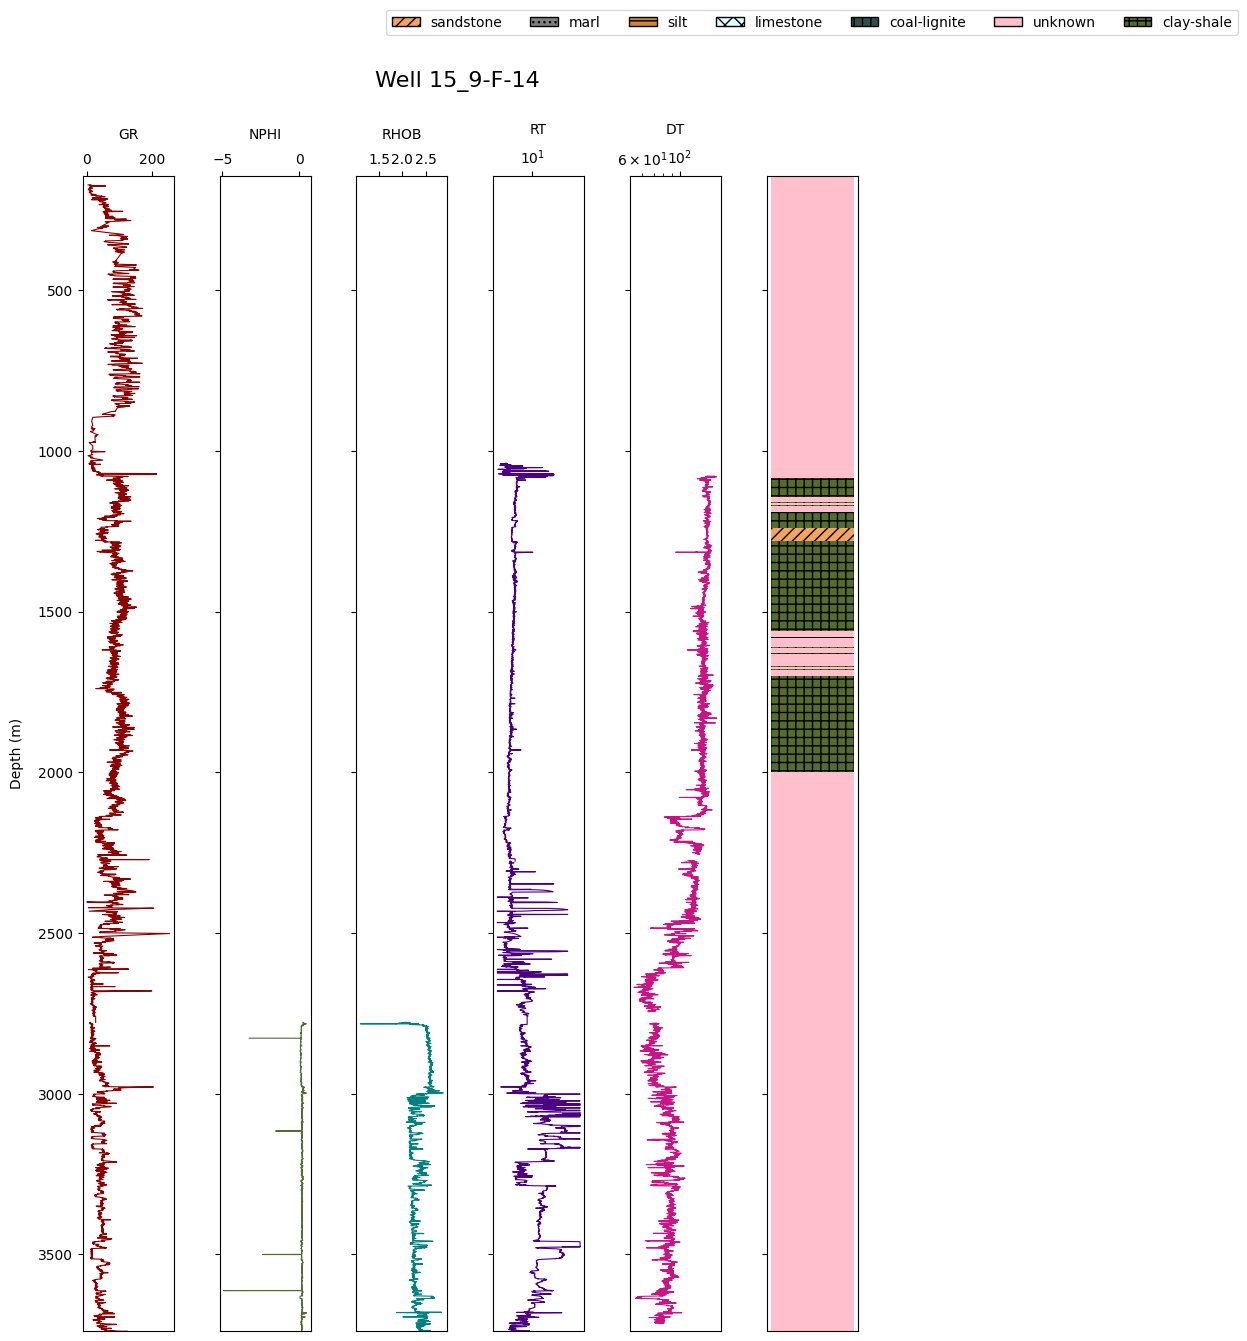

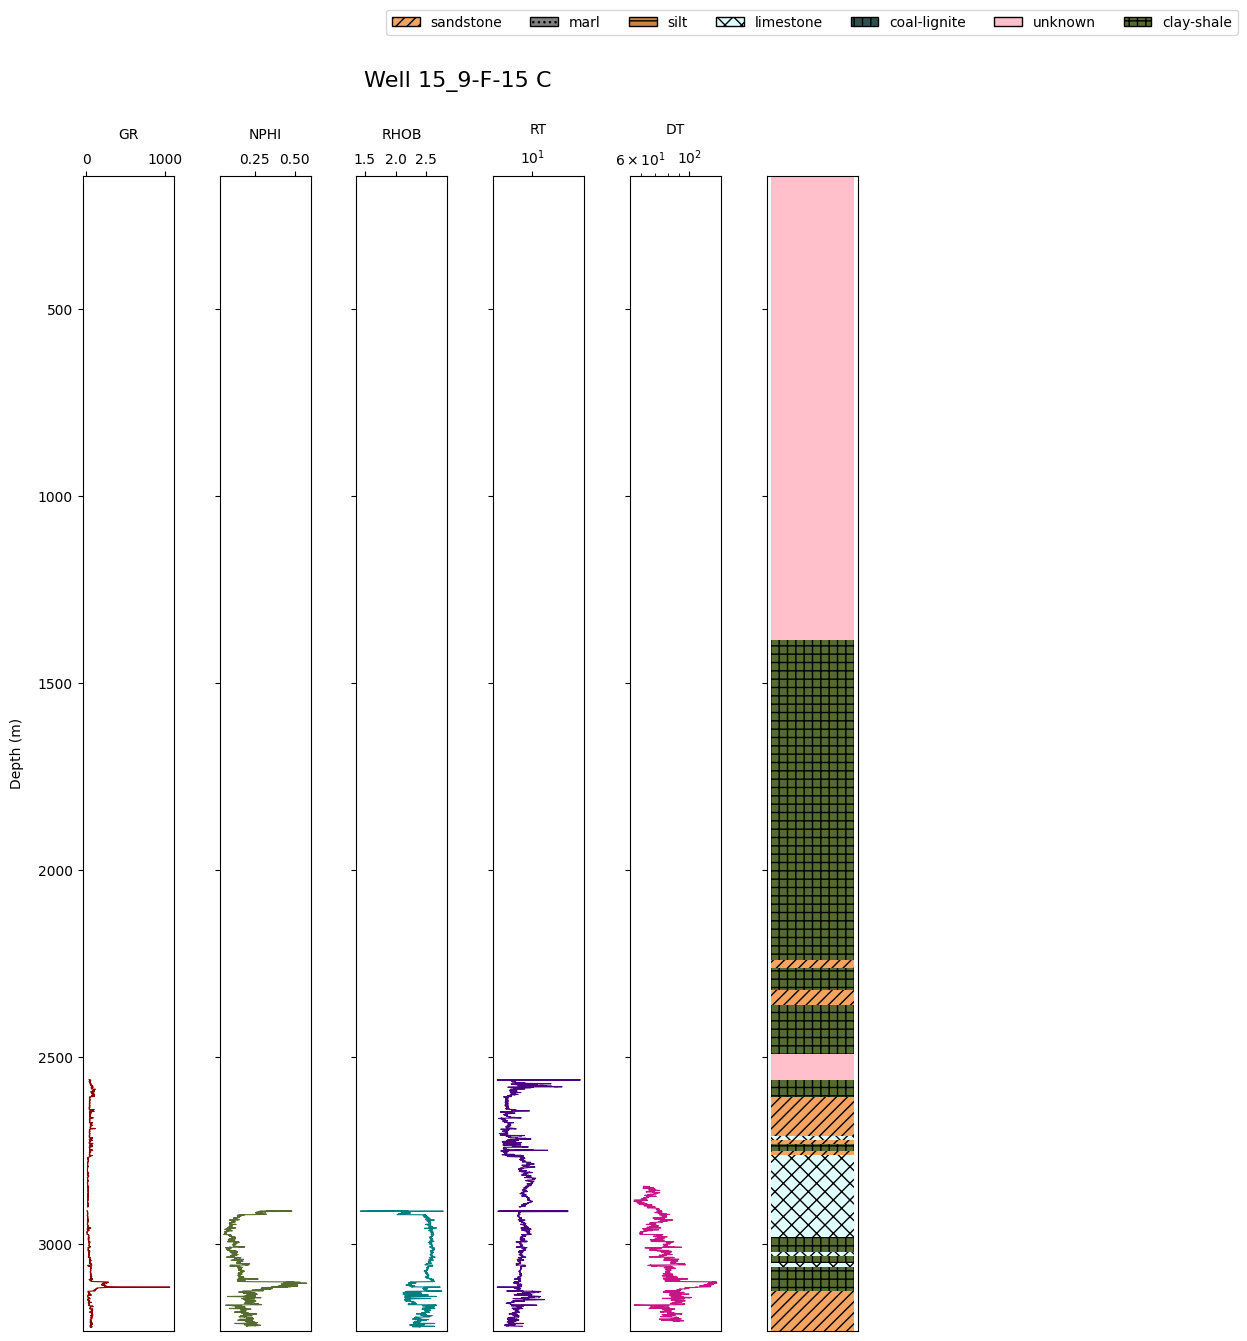

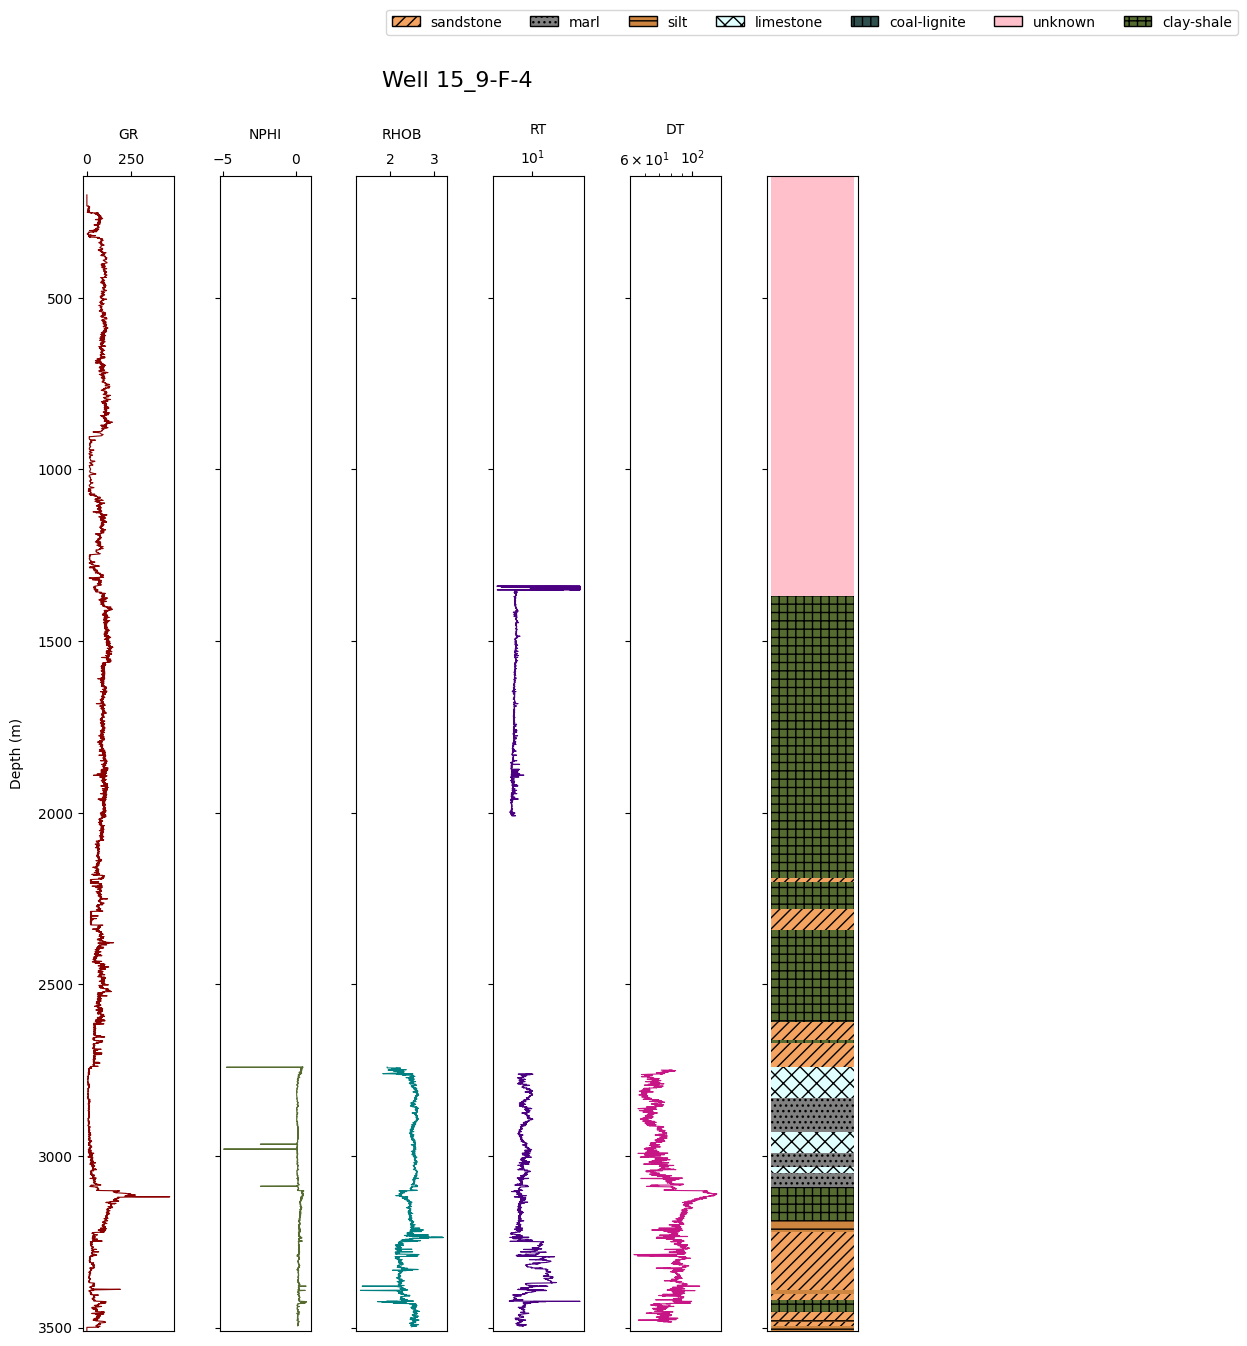

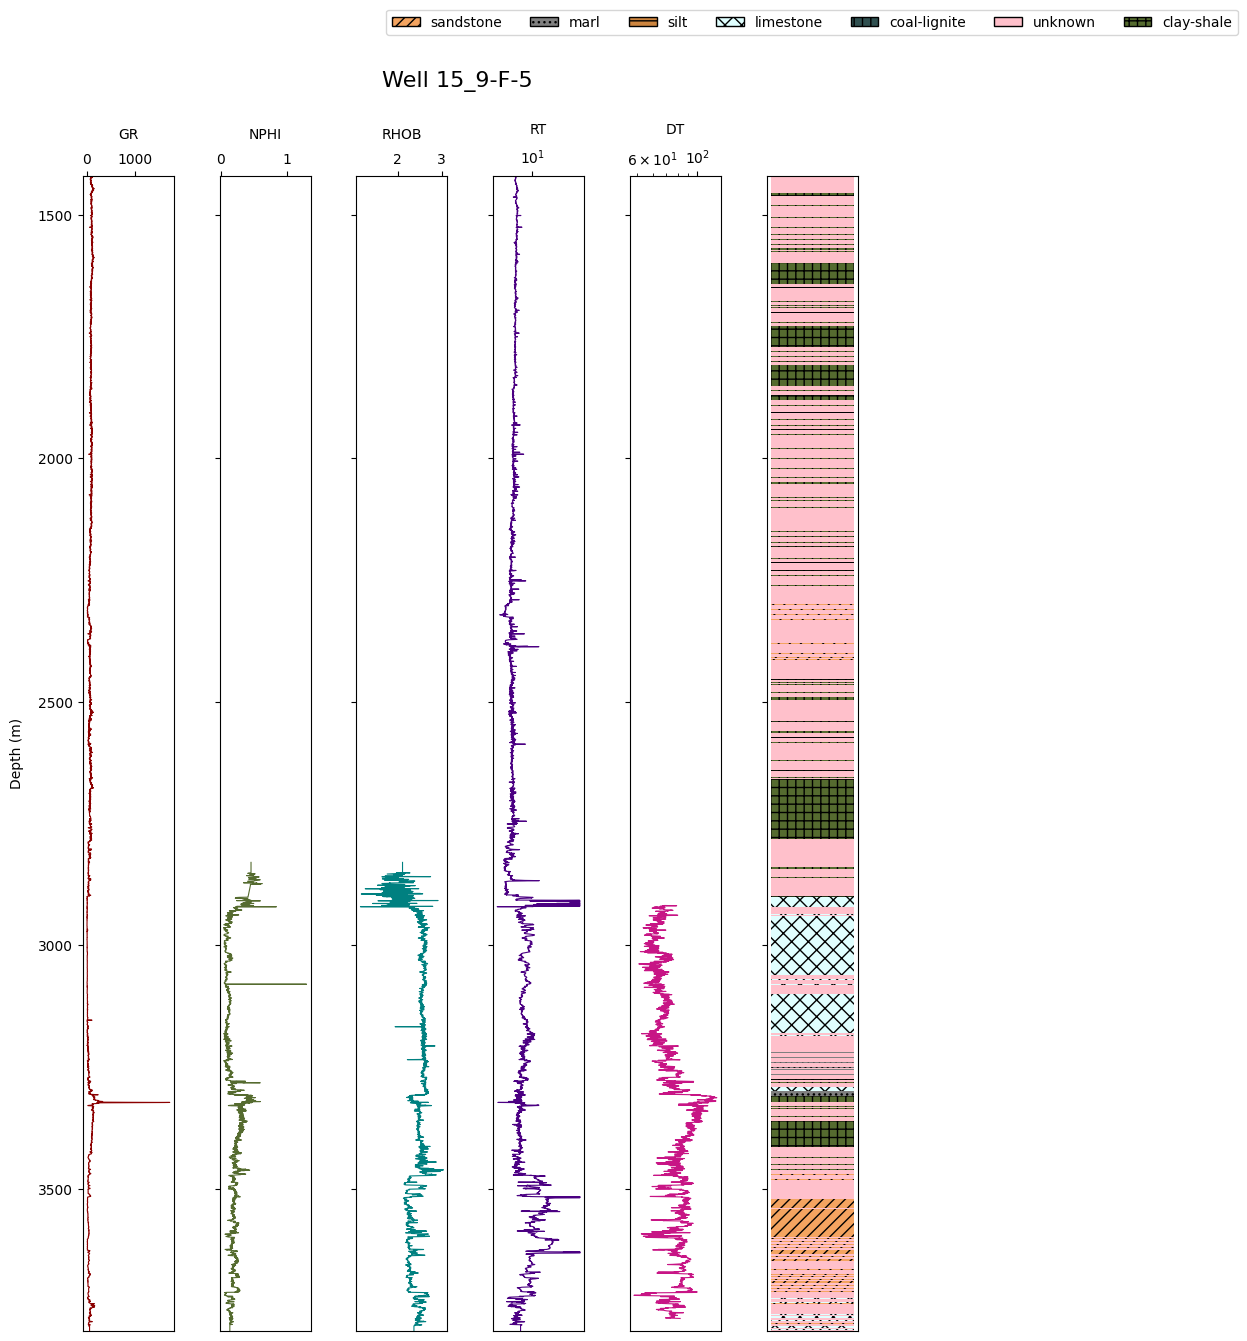

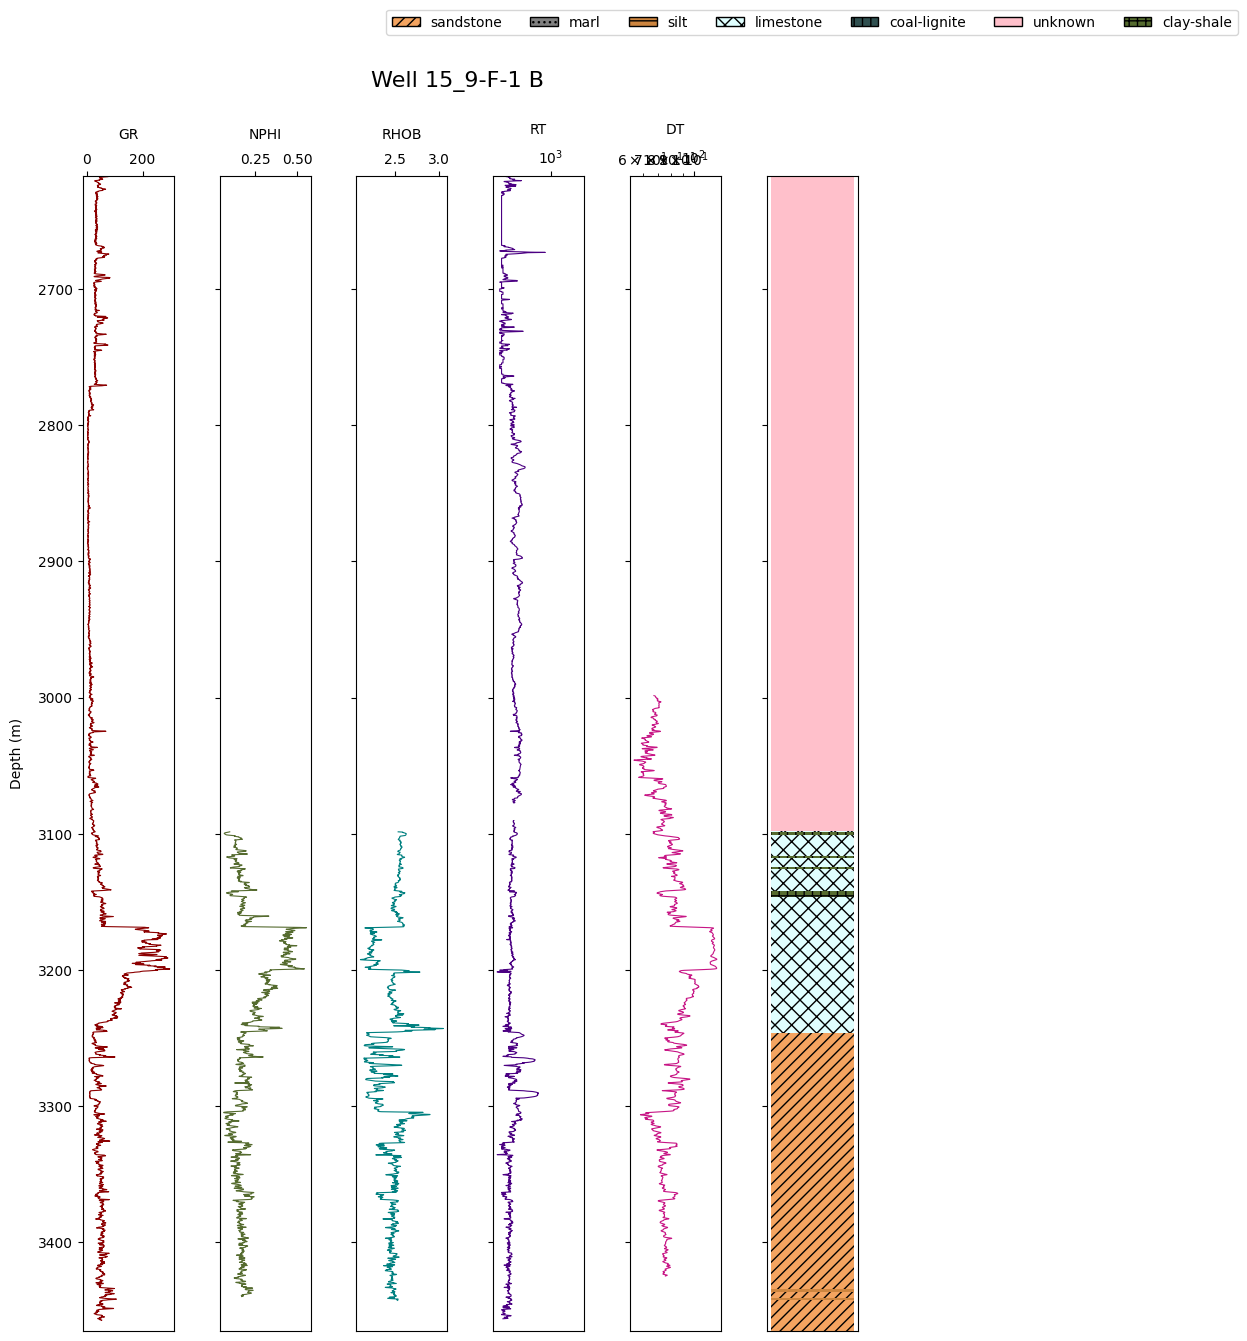

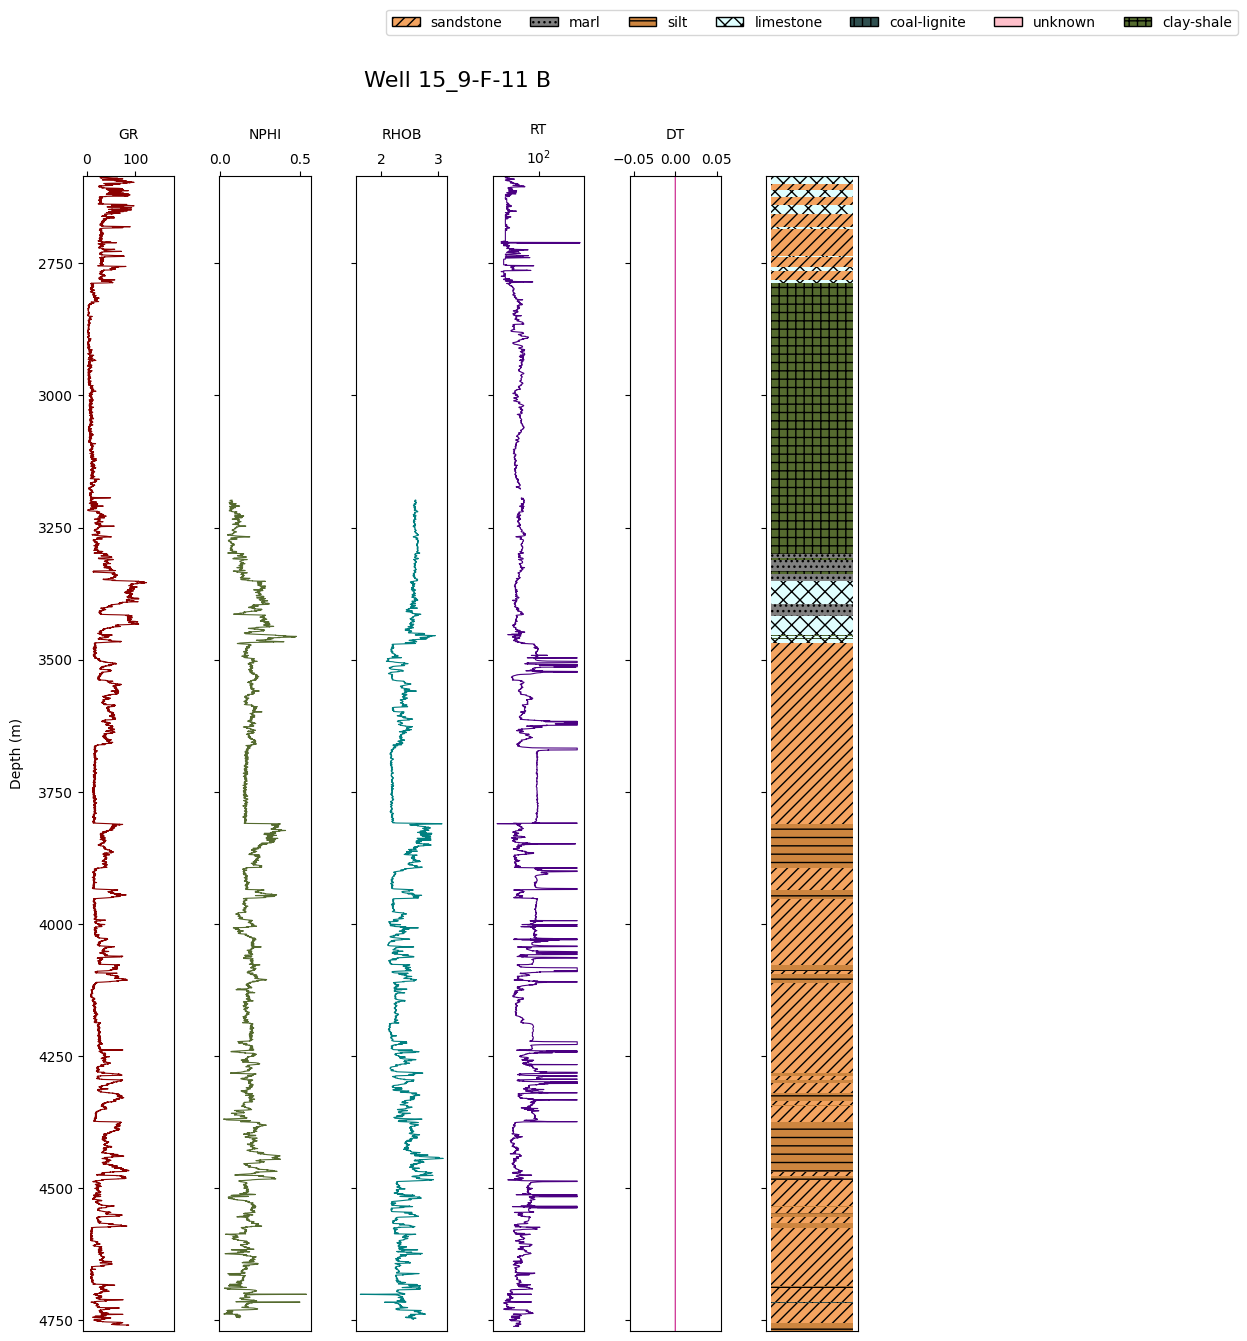

In [13]:
for i in range(len(well_data_all)):
    well_name = well_data_names[i]
    well_data = well_data_all[i]
    
    DEPTH = well_data['DEPTH'].values
    GR = well_data['GR'].values
    NPHI = well_data['NPHI'].values
    RHOB = well_data['RHOB'].values
    RT = well_data['RT'].values
    DT = well_data['DT'].values

    lithology_data = lithology_data_all[i]
    
    # extracting lithology data
    depth_for_lithology = lithology_data['Depth'].values
    lithology = lithology_data['Lithology'].values

    # create 5 subplots in a single row
    fig, axes = plt.subplots(1, 6, figsize=(10, 15)) 
    curve_names = ['GR', 'NPHI', 'RHOB', 'RT', 'DT', '']
    # assign each subplot to a variable
    ax1, ax2, ax3, ax4, ax5, ax6 = axes

    # plot radioactivity content, GR (Gamma-Ray), measured in API
    ax1.plot(GR, DEPTH, color="darkred", lw=0.8)
    ax1.set_ylabel('Depth (m)', labelpad=10)
    # plot formation porosity, NPHI , measured in v/v
    ax2.plot(NPHI, DEPTH, color="darkolivegreen", lw=0.8)
    # plot formation bulk density, RHOB, measured in g/cm**3
    ax3.plot(RHOB, DEPTH, color="teal", lw=0.8)
    # plot formation true resistivity,RT, measured in ohm-meter
    ax4.plot(RT, DEPTH, color="indigo", lw=0.8)
    ax4.set_xscale('log')
    # plot compressional (P-wave) travel time, measured in microseconds/foot
    ax5.plot(DT, DEPTH, color="mediumvioletred", lw=0.8)
    if i!=6:
        ax5.set_xscale('log')

    # set up the common elements between the subplots
    for i, ax in enumerate(fig.axes):
        ax.set_ylim(max(depth_for_lithology), min(depth_for_lithology))  # set the depth range (inverted axis)
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.set_xlabel(curve_names[i], labelpad=10)  # adjust the labelpad value as needed

    # plot lithology log
    for i in range(len(depth_for_lithology) - 1):
        lith = lithology[i]
        hatch = lithology_labels[lith]['hatch']
        color = lithology_labels[lith]['color']
        ax6.fill_betweenx([depth_for_lithology[i], depth_for_lithology[i+1]], 0, 1, facecolor=color, hatch=hatch)
    handles = [] # create a legend
    for lith, attrs in lithology_labels.items():
        patch = mpatches.Patch(facecolor=attrs['color'], hatch=attrs['hatch'], edgecolor='k', label=f'{lith}')
        handles.append(patch)
    ax6.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(handles), fancybox=True)
    ax6.set_xticks([])

    # hide tick labels on the y-axis for the right four subplots
    for ax in [ax2, ax3, ax4, ax5, ax6]:
        plt.setp(ax.get_yticklabels(), visible=False)

    # reduce the space between each subplot
    fig.subplots_adjust(wspace=0.5)

    # plot title
    fig.suptitle(well_name, fontsize=16, y=0.95)
    
    plt.show()

**Reference**

- Equinor, A. S. A. (2023). Volve field dataset.
- Andy McDonald. (2020). Petrophysics-Python-Series/14 - Displaying Lithology Data.ipynb at master · andymcdgeo/Petrophysics-Python-Series. GitHub. https://github.com/andymcdgeo/Petrophysics-Python-Series/blob/master/14%20-%20Displaying%20Lithology%20Data.ipynb